Train, validate and develop a machine learning pipeline using PyCaret.
Build a front-end web application with two functionalities: (i) online prediction and (ii) batch prediction.
Deploy the web app on Heroku. Once deployed, it will become publicly available and can be accessed via Web URL.

https://moez-62905.medium.com/build-a-simple-machine-learning-web-application-using-streamlit-and-deploy-on-heroku-in-5-easy-8264d3b21b43

In [15]:
import pandas as pd

data = pd.read_csv('d://datasets/insurance.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [39]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [1]:
# %pip install --pre pycaret
import pycaret
pycaret.__version__

'3.0.0.rc9'

In [16]:
# init setup
from pycaret.regression import *
import pycaret

s = setup(data, target = 'charges', session_id = 123, normalize = True,bin_numeric_features= ['age', 'bmi'])

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


In [17]:
# Model Training and Validation 
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4393.5369,36305612.3305,6025.4139,0.7832,0.6498,0.4759
1,4454.6946,44701691.7168,6685.9324,0.7401,0.7324,0.4227
2,3796.6981,29648804.2061,5445.0716,0.6246,0.5496,0.4686
3,3773.9077,27048525.1810,5200.8197,0.7741,0.5428,0.5102
4,4537.7119,44376655.6658,6661.5806,0.6699,0.5807,0.4291
5,4072.6426,36441553.1917,6036.6840,0.7656,0.7406,0.3937
6,4236.8603,40503827.1111,6364.2617,0.7244,0.6192,0.4535
7,4872.3970,46475255.9833,6817.2763,0.7444,0.5422,0.3923
8,4683.5755,42226069.9076,6498.1590,0.7273,0.8243,0.5704


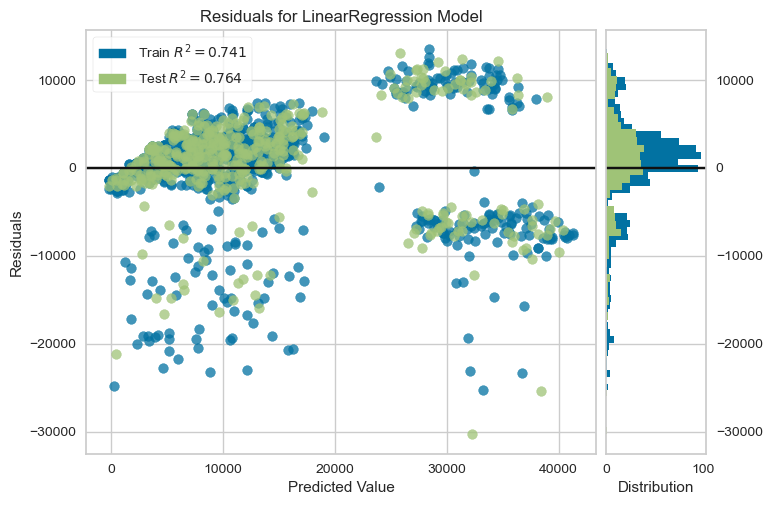

In [18]:
# plot residuals of trained model
plot_model(lr, plot = 'residuals')

In [19]:
# save pipeline on disk
save_model(lr, model_name = 'deployment_28042020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\jespi\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerW...
                  TransformerWrapper(include=['region'],
                                     transformer=OneHotEncoder(cols=['region'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('bin_numeric_features',
                  TransformerWrapper(include=['age', 'bmi'],
                                     transf

In [20]:
deployment_28042020 = load_model('deployment_28042020')

Transformation Pipeline and Model Successfully Loaded


In [21]:
deployment_28042020


Pipeline(memory=FastMemory(location=C:\Users\jespi\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerW...
                 TransformerWrapper(include=['region'],
                                    transformer=OneHotEncoder(cols=['region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('bin_numeric_features',
                 TransformerWrapper(include=['age', 'bmi'],
                                    transformer=KBinsDiscr

In [ ]:
import requests
url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
print(pred.json())

In [42]:
age = 100
sex = 'male'
bmi = 50
children = 5
region = 'southwest'
smoker = 'yes'
output=""

input_dict = {'age' : age, 'sex' : sex, 'bmi' : bmi, 'children' : children, 'region':region, 'smoker': smoker}
input_df = pd.DataFrame([input_dict])
input_df

,age,sex,bmi,children,region,smoker
0,100,male,50,5,southwest,yes


In [45]:
model = load_model('deployment_28042020')

predictions_df = predict_model(estimator=model, data=input_df)
predictions_df

Transformation Pipeline and Model Successfully Loaded


,age,sex,bmi,children,region,smoker,prediction_label
0,100,male,50,5,southwest,yes,43264.681061


In [48]:
predictions = predictions_df['prediction_label'][0]
predictions

43264.681060663046